# **Project: Markov Simulation**
+ simulates the customer behaviour at a supermarket.

---
---

## **0. Imports**

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from datetime import datetime, timedelta
import datetime as dt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20,6)

---

## **1. Load and prepare the data**

In [2]:
df1 = pd.read_csv('Data/monday.csv' ,sep=';')
df2 = pd.read_csv('Data/tuesday.csv' ,sep=';')
df3 = pd.read_csv('Data/wednesday.csv' ,sep=';')
df4 = pd.read_csv('Data/thursday.csv' ,sep=';')
df5 = pd.read_csv('Data/friday.csv' ,sep=';')

In [3]:
df1['customer_complete']=df1['customer_no']
df2['customer_complete']=df2['customer_no']+ df1['customer_complete'].max()
df3['customer_complete']=df3['customer_no']+ df2['customer_complete'].max()
df4['customer_complete']=df4['customer_no']+ df3['customer_complete'].max()
df5['customer_complete']=df5['customer_no']+ df4['customer_complete'].max()


df1.drop(['customer_no'], axis=1,inplace=True)
df2.drop(['customer_no'], axis=1,inplace=True)
df3.drop(['customer_no'], axis=1,inplace=True)
df4.drop(['customer_no'], axis=1,inplace=True)
df5.drop(['customer_no'], axis=1,inplace=True)


In [4]:
df_full= pd.concat([df1, df2, df3, df4, df5])

In [5]:
df_full

,timestamp,location,customer_complete
0,2019-09-02 07:03:00,dairy,1
1,2019-09-02 07:03:00,dairy,2
2,2019-09-02 07:04:00,dairy,3
3,2019-09-02 07:04:00,dairy,4
4,2019-09-02 07:04:00,spices,5
...,...,...,...
5120,2019-09-06 21:50:00,dairy,7435
5121,2019-09-06 21:50:00,checkout,7442
5122,2019-09-06 21:50:00,checkout,7443
5123,2019-09-06 21:50:00,drinks,7444


---

## **2. Analyzing data and Feature Engineering**

In [6]:
df_full.dtypes

timestamp            object
location             object
customer_complete     int64
dtype: object

In [7]:
df_full['timestamp'] =  pd.to_datetime(df_full['timestamp'])

In [8]:
df_full['weekday']= df_full['timestamp'].dt.day

In [9]:
df_full['weekday_names']= df_full['timestamp'].dt.day_name()

In [10]:
df_full['hour']= df_full['timestamp'].dt.hour

In [11]:
df_full = df_full.reset_index()
df_full.drop(columns = ['index'], axis =0, inplace =True)

In [12]:
df_full

,timestamp,location,customer_complete,weekday,weekday_names,hour
0,2019-09-02 07:03:00,dairy,1,2,Monday,7
1,2019-09-02 07:03:00,dairy,2,2,Monday,7
2,2019-09-02 07:04:00,dairy,3,2,Monday,7
3,2019-09-02 07:04:00,dairy,4,2,Monday,7
4,2019-09-02 07:04:00,spices,5,2,Monday,7
...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,dairy,7435,6,Friday,21
24873,2019-09-06 21:50:00,checkout,7442,6,Friday,21
24874,2019-09-06 21:50:00,checkout,7443,6,Friday,21
24875,2019-09-06 21:50:00,drinks,7444,6,Friday,21


---

## **3. Visualization**

### Calculate the total number of customers in each section

<AxesSubplot:xlabel='location'>

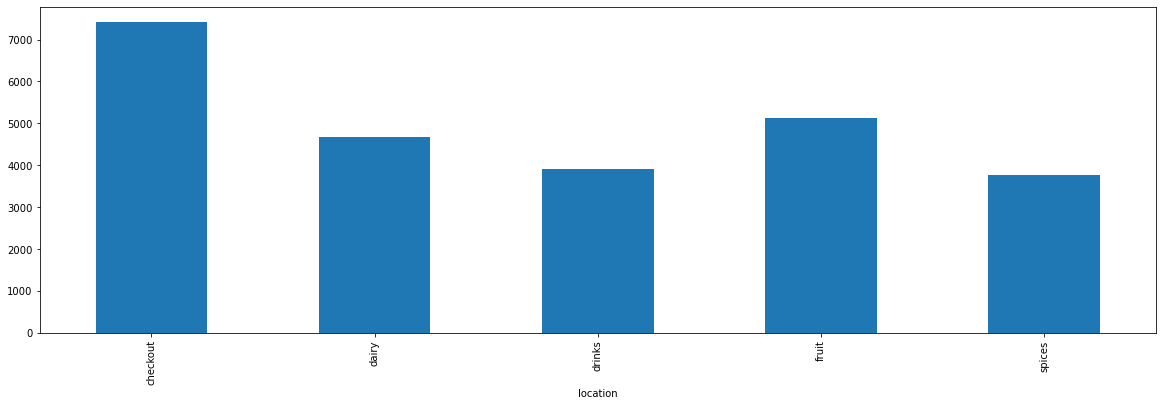

In [13]:
df_full.groupby(['location'])['customer_complete'].count().plot.bar()

### Calculate the total number of customers in each section over time

<AxesSubplot:xlabel='location'>

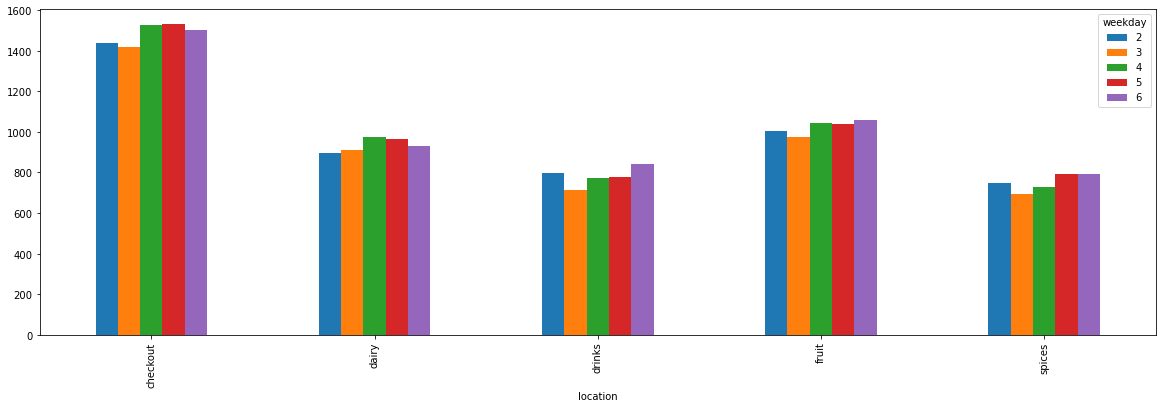

In [14]:
df_full.groupby(['location', 'weekday'])['customer_complete'].count().unstack().plot.bar()

### Display the number of customers at checkout over time

<AxesSubplot:xlabel='weekday'>

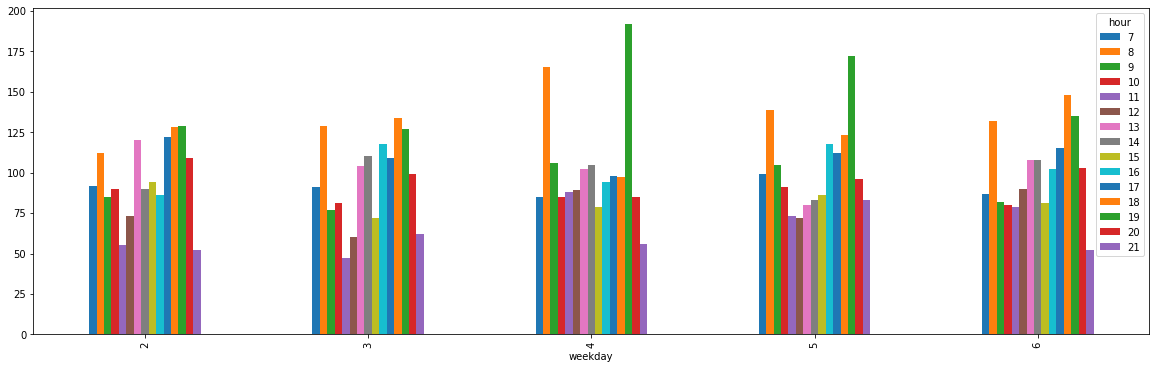

In [15]:
df_full[df_full['location']=='checkout'].groupby(['weekday','hour'])['customer_complete'].count().unstack().plot(kind='bar')

### Calculate the time each customer spent in the market

In [16]:
time_in_market = {}
for i in df_full['customer_complete']:
    markettime = df_full.loc[df_full['customer_complete'] == i]['timestamp'].max() - df_full.loc[df_full['customer_complete'] == i]['timestamp'].min()
    time_in_market[i]= markettime

In [17]:
time_dataframe = pd.DataFrame.from_dict(time_in_market, orient='index', columns= ['time in market'])

In [18]:
minutes = (time_dataframe['time in market'].dt.seconds)/60
time_dataframe['minutes in market'] = minutes

In [19]:
time_dataframe[['minutes in market']]

,minutes in market
1,2.0
2,3.0
3,2.0
4,4.0
5,1.0
...,...
7441,0.0
7442,2.0
7443,2.0
7444,0.0


### Calculate the total number of customers in the supermarket over time.

In [20]:
customer_counter = []
counter=0
for j in range(len(df_full)):
    if df_full['timestamp'][j] == df_full.loc[df_full['customer_complete'] == df_full['customer_complete'][j]]['timestamp'].min():
        counter = counter +1
        customer_counter.append(counter)
    elif df_full['timestamp'][j] == df_full.loc[df_full['customer_complete'] == df_full['customer_complete'][j]]['timestamp'].max():
        counter = counter -1
        customer_counter.append(counter)
    else:
        customer_counter.append(counter)

In [21]:
df_full['costumer counter'] = customer_counter

In [22]:
df_full

,timestamp,location,customer_complete,weekday,weekday_names,hour,costumer counter
0,2019-09-02 07:03:00,dairy,1,2,Monday,7,1
1,2019-09-02 07:03:00,dairy,2,2,Monday,7,2
2,2019-09-02 07:04:00,dairy,3,2,Monday,7,3
3,2019-09-02 07:04:00,dairy,4,2,Monday,7,4
4,2019-09-02 07:04:00,spices,5,2,Monday,7,5
...,...,...,...,...,...,...,...
24872,2019-09-06 21:50:00,dairy,7435,6,Friday,21,9
24873,2019-09-06 21:50:00,checkout,7442,6,Friday,21,8
24874,2019-09-06 21:50:00,checkout,7443,6,Friday,21,7
24875,2019-09-06 21:50:00,drinks,7444,6,Friday,21,8


---

## **4. Generating Transition Matrix**

In [23]:
df_full.sort_values(by= ['customer_complete','timestamp'], axis=0 , inplace=True)

In [24]:
df_full.head(20)

,timestamp,location,customer_complete,weekday,weekday_names,hour,costumer counter
0,2019-09-02 07:03:00,dairy,1,2,Monday,7,1
8,2019-09-02 07:05:00,checkout,1,2,Monday,7,7
1,2019-09-02 07:03:00,dairy,2,2,Monday,7,2
12,2019-09-02 07:06:00,checkout,2,2,Monday,7,5
2,2019-09-02 07:04:00,dairy,3,2,Monday,7,3
13,2019-09-02 07:06:00,checkout,3,2,Monday,7,4
3,2019-09-02 07:04:00,dairy,4,2,Monday,7,4
24,2019-09-02 07:08:00,checkout,4,2,Monday,7,10
4,2019-09-02 07:04:00,spices,5,2,Monday,7,5
9,2019-09-02 07:05:00,checkout,5,2,Monday,7,6


In [25]:
df_full['location2'] = df_full['location'].shift(-1)

In [26]:
for i in range(len(df_full)):
    if df_full['location'][i] == 'checkout':
        df_full['location2'][i] = 'checkout'

<ipython-input-26-c0354a189581>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['location2'][i] = 'checkout'


In [27]:
cross = pd.crosstab(df_full['location'], df_full['location2'], normalize=0)

In [28]:
cross

location2,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.390041,0.001282,0.222697,0.190425,0.195555
drinks,0.536748,0.027145,0.000000,0.219206,0.216901
fruit,0.498829,0.237993,0.136861,0.000586,0.125732
spices,0.250733,0.323741,0.272848,0.152411,0.000266


<AxesSubplot:xlabel='location2', ylabel='location'>

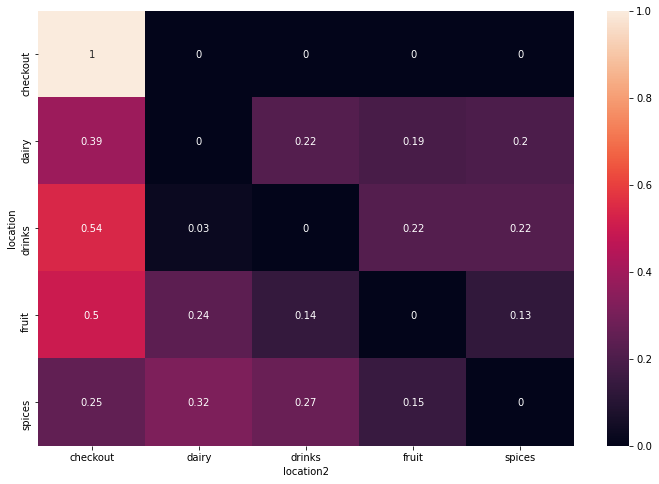

In [29]:
# inspect correlation
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(round(cross[['checkout','dairy','drinks','fruit', 'spices']], 2), annot=True)

---

## **5. Creating Customer and Supermarket Class**

In [30]:
cross

location2,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.390041,0.001282,0.222697,0.190425,0.195555
drinks,0.536748,0.027145,0.000000,0.219206,0.216901
fruit,0.498829,0.237993,0.136861,0.000586,0.125732
spices,0.250733,0.323741,0.272848,0.152411,0.000266


### **Incoming Customer**

In [334]:
# create customer class
class Customer:
    """
    a single customer that moves through the supermarket
    in a MCMC simulation
    """
    def __init__(self, name, state, transition_probs ,budget =100):
        self.name= name
        self.state= state
        self.budget= budget
        self.transition_probs = cross.loc[self.state]
    def __repr__(self):
        return f'Customer {self.name} is currently in the {self.state} section'
    def is_active(self):
        """Returns True if the customer has not reached the checkout yet."""
        if self.state == 'checkout':
            return False
        else:
            return True
    def next_state(self):
        '''
        Propagates the customer to the next state.
        Returns nothing.
        '''
        self.state = np.random.choice(['checkout', 'dairy', 'drinks', 'fruit','spices'],p=self.transition_probs)
        self.transition_probs = cross.loc[self.state]

In [1003]:
cust1 = Customer("Kevin", "drinks",cross, 50)
cust2 = Customer("Deepak", "spices",cross)
cust3 = Customer("Anastasía", "dairy", cross, 70 )
cust4 = Customer("Gizmo", "drinks",cross, 50)
cust5 = Customer("Joaquin", "spices",cross)
cust6 = Customer("Cissy", "fruit", cross, 80 )

In [1004]:
print(cust1)
while cust1.is_active():
    cust1.next_state()
    print(cust1)

Customer Kevin is currently in the drinks section
Customer Kevin is currently in the checkout section


In [1005]:
print(cust3)
while cust3.is_active():
    cust3.next_state()
    print(cust3)

Customer Anastasía is currently in the dairy section
Customer Anastasía is currently in the drinks section
Customer Anastasía is currently in the dairy section
Customer Anastasía is currently in the checkout section


### **In the Supermarket**

In [958]:
class supermarket(Customer):
    """manages multiple Customer instances that are currently in the market.
    """
    def __init__(self, market_name):
        self.customers = {}
        self.customers_in_market = {}
        self.items = []
        self.minutes = 0
        self.last_id = 0
        self.customer_counter = 0
        self.market_name = market_name
        self.current_time = pd.to_datetime('07:00',format='%H:%M')
        
    def __repr__(self):
        return f'Welcome to the {self.market_name} supermarket!!'

    
    def get_time(self):
        """current time in HH:MM format,
        """
        currentTime_timestamp = self.current_time
        currentTime = currentTime_timestamp.strftime("%H:%M")
        print("Current Time =", currentTime)
        return None

    
    def remove_exitsting_customers(self): 
        #make it work
        """remove churned customers from the supermarket
        """
        for customer in self.customers:
            if customer.state == 'checkout':
                 customers.pop(customer)
        return None
    

    def next_minute(self):
        #for every customer determine their next state
        """propagates all customers to the next state.
        """
        
        self.current_time  = (self.current_time + dt.timedelta(minutes = 1))
        next_timestep = self.current_time.strftime("%H:%M")
        self.minutes = self.minutes +1
        
        if self.customer_counter < len(self.customers.keys()) :
            self.customers_in_market[self.customer_counter] = self.customers[self.customer_counter] 
            self.customer_counter = self.customer_counter + 1
   
        print("Next Timestep =", next_timestep)
        print("")       
        print("__________________")
        print("")
        
        for customer in self.customers_in_market.values():
            if customer.is_active() == True:
                
                items_in_state = [x for x in market.items if x[0] == customer.state]
                random_item= random.sample(items_in_state, 1)
                if customer.state == 'checkout':
                    print(f'{customer.name} ends up in the {customer.state} section and leaves with a budget of {customer.budget} €')
                else:                 
                    print(f'{customer.name} is in the {customer.state} section and buys {random_item[0][1]} for {random_item[0][2]} €' )
                    customer.budget = customer.budget - random_item[0][2] 
                    print(f'The remaining budget of {customer.name} is {customer.budget} €')
                customer.next_state()
            else:
                print(f'{customer.name} ends up in the {customer.state} section and leaves with a budget of {customer.budget} €')
                #for customer in self.customers_in_market.values():
                #self.customers_in_market.pop(value = customer)
            print()
            print()       
        return None                      

    
    def add_customer(self, customer):
        self.customers[self.last_id] = customer
        #self.customers.extend(self.last_id)
        self.last_id = int(self.last_id) +1
              
        
    def clear_customers(self):
        self.customers.clear()  
        
    def add_items(self, state , items, price):
        self.items.append([state, items, price])
        
    def clear_items(self):
        self.items.clear()  
        
    def goes_shopping(self):
        for customer in self.customers.values():
            items_in_state = [x for x in market.items if x[0] == customer.state]
            random_item= random.sample(items_in_state, 1)

            print(f'Customer {customer.name} is currently in the {customer.state} section and buys {random_item[0][1]} for {random_item[0][2]} €' )
            customer.budget = customer.budget - random_item[0][2] 
            print(f'The remaining budget of {customer.name} is {customer.budget} €')
            while customer.is_active():
                customer.next_state()
                items_in_state = [x for x in market.items if x[0] == customer.state]
                random_item= random.sample(items_in_state, 1)
                if customer.state == 'checkout':
                    print(f'{customer.name} is in the {customer.state} section and leaves with a budget of {customer.budget} €')
                else:                 
                    print(f'{customer.name} moves on to the {customer.state} section and buys {random_item[0][1]} for {random_item[0][2]} €' )
                    customer.budget = customer.budget - random_item[0][2] 
                    print(f'The remaining budget of {customer.name} is {customer.budget} €')
            print()
            print()


In [1006]:
market = supermarket('REWE')
print(market)

Welcome to the REWE supermarket!!


### **Define the available items in the supermarket**

In [1007]:
market.clear_items()
market.add_items('drinks', 'FritzCola', 3)
market.add_items('drinks', 'Water', 1.5)
market.add_items('drinks', 'IceTea', 3)
market.add_items('drinks', 'Wine', 10)
market.add_items('dairy', 'Yogurt', 3)
market.add_items('dairy', 'Butter', 4)
market.add_items('dairy', 'Milk', 1)
market.add_items('dairy', 'Cream', 3)
market.add_items('fruit', 'Blueberry', 5)
market.add_items('fruit', 'Banana', 2)
market.add_items('fruit', 'Strawberry', 6)
market.add_items('fruit', 'Cherry', 6)
market.add_items('spices', 'Sumac', 3)
market.add_items('spices', 'Pepper', 2)
market.add_items('spices', 'Salt', 1)
market.add_items('spices', 'Safran', 10)
market.add_items('checkout', 'nothing', 0)

In [982]:
market.items

[['drinks', 'FritzCola', 3],
 ['drinks', 'Water', 1.5],
 ['drinks', 'IceTea', 3],
 ['drinks', 'Wine', 10],
 ['dairy', 'Yogurt', 3],
 ['dairy', 'Butter', 4],
 ['dairy', 'Milk', 1],
 ['dairy', 'Cream', 3],
 ['fruit', 'Blueberry', 5],
 ['fruit', 'Banana', 2],
 ['fruit', 'Strawberry', 6],
 ['fruit', 'Cherry', 6],
 ['spices', 'Sumac', 3],
 ['spices', 'Pepper', 2],
 ['spices', 'Salt', 1],
 ['spices', 'Safran', 10],
 ['checkout', 'nothing', 0]]

### **Define a set of costumers**

In [999]:
cust1 = Customer("Kevin", "drinks",cross, 50)
cust2 = Customer("Deepak", "spices",cross)
cust3 = Customer("Anastasia", "dairy", cross, 70 )
cust4 = Customer("Gizmo", "drinks",cross, 50)
cust5 = Customer("Joaquin", "spices",cross)
cust6 = Customer("Cissy", "fruit", cross, 80 )

In [1000]:
market.clear_customers()
market.add_customer(cust1)
market.add_customer(cust2)
market.add_customer(cust3)
market.add_customer(cust4)
market.add_customer(cust5)
market.add_customer(cust6)

### **Let the customers move in**

In [985]:
market.get_time()

Current Time = 07:00


In [995]:
### repeating this line will make the customers move around the supermarket. After each minute each costumers goes to another aile and buys another item
market.next_minute()

Next Timestep = 07:10

__________________

Kevin ends up in the checkout section and leaves with a budget of 29.5 €


Deepak ends up in the checkout section and leaves with a budget of 89.5 €


Anastasia ends up in the checkout section and leaves with a budget of 63 €


Gizmo ends up in the checkout section and leaves with a budget of 40 €


Joaquin ends up in the checkout section and leaves with a budget of 70 €


Cissy ends up in the checkout section and leaves with a budget of 54 €




In [996]:
market.customers_in_market

{0: Customer Kevin is currently in the checkout section,
 1: Customer Deepak is currently in the checkout section,
 2: Customer Anastasia is currently in the checkout section,
 3: Customer Gizmo is currently in the checkout section,
 4: Customer Joaquin is currently in the checkout section,
 5: Customer Cissy is currently in the checkout section}

### **Let customers go shopping at once**

In [997]:
market.clear_customers()
market.add_customer(cust1)
market.add_customer(cust2)
market.add_customer(cust3)
market.add_customer(cust4)
market.add_customer(cust5)
market.add_customer(cust6)

In [1001]:
market.goes_shopping()

Customer Kevin is currently in the drinks section and buys Wine for 10 €
The remaining budget of Kevin is 40 €
Kevin moves on to the spices section and buys Salt for 1 €
The remaining budget of Kevin is 39 €
Kevin moves on to the drinks section and buys Wine for 10 €
The remaining budget of Kevin is 29 €
Kevin moves on to the spices section and buys Salt for 1 €
The remaining budget of Kevin is 28 €
Kevin moves on to the drinks section and buys Water for 1.5 €
The remaining budget of Kevin is 26.5 €
Kevin moves on to the dairy section and buys Milk for 1 €
The remaining budget of Kevin is 25.5 €
Kevin moves on to the fruit section and buys Cherry for 6 €
The remaining budget of Kevin is 19.5 €
Kevin is in the checkout section and leaves with a budget of 19.5 €


Customer Deepak is currently in the spices section and buys Safran for 10 €
The remaining budget of Deepak is 90 €
Deepak is in the checkout section and leaves with a budget of 90 €


Customer Anastasia is currently in the dair

In [1002]:
market.customers

{12: Customer Kevin is currently in the checkout section,
 13: Customer Deepak is currently in the checkout section,
 14: Customer Anastasia is currently in the checkout section,
 15: Customer Gizmo is currently in the checkout section,
 16: Customer Joaquin is currently in the checkout section,
 17: Customer Cissy is currently in the checkout section}